In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

%matplotlib inline

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
digits = load_digits() 

In [3]:
df = pd.DataFrame(digits.data)
df_target = pd.Series(digits.target)

In [4]:
print(df.shape)
print(len(df_target))

(1797, 64)
1797


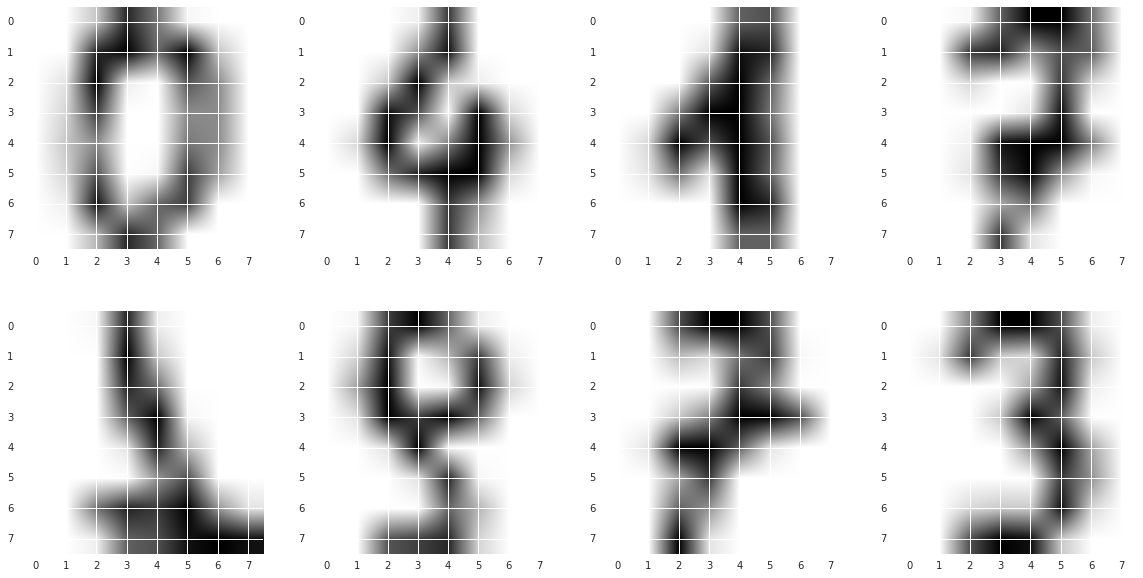

In [15]:
fig = plt.figure(figsize=(20,10))
for i in range(0,8):
    if i < 4:
        ax = fig.add_subplot(2,4,i+1)
        plt.imshow(df.iloc[i*100].values.reshape(8,8))
    else:
        ax = fig.add_subplot(2,4,i+1)
        plt.imshow(df.iloc[(i-4)*100+1000].values.reshape(8,8))


In [6]:
df_train, df_test, df_target_train, df_target_test = train_test_split(df, df_target, test_size=0.3, random_state=123)


In [7]:
def train(k, train, target, test, test_target):
    knnimg = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knnimg.fit(train, target)
    knnimg_pred = knnimg.predict(test)
    print(classification_report(test_target, knnimg_pred))

In [8]:
def nfold(k, train, target):
    knnimg = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knnimg = knnimg.fit(train, target)
    cv_scores = cross_validation.cross_val_score(knnimg, train, target, cv=4)
    return np.mean(cv_scores)


In [30]:
nei = [3,5,7,9,11,13]
def cvnei(arr, fun, df, df_target):
    score = []
    for i in arr:
        score.append(fun(i, df, df_target))  
    plt.plot(nei,score)
cvnei(nei, nfold)

TypeError: cvnei() missing 2 required positional arguments: 'df' and 'df_target'

In [10]:
score

[0.9627818423985353,
 0.9622111249952552,
 0.9571958301273003,
 0.957219253342641,
 0.9533305121074194,
 0.9516476324854702]

In [27]:
def nn(k, train, target):
    mlp = MLPClassifier(hidden_layer_sizes=(k,), max_iter=500)
    mlp.fit(train, target)
    cv_scores = cross_validation.cross_val_score(mlp, train, target, cv=4)
    return np.mean(cv_scores)

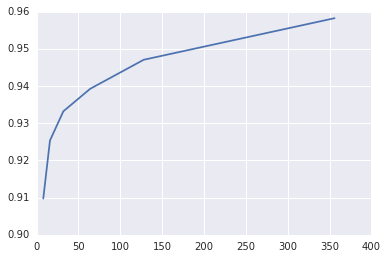

In [31]:
lay = [8,16,32,64,128,256]
num = []
for i in lay:
    num.append(nn(i, df, df_target))
plt.plot(lay,num)

The scores of neural networks are not as good as the KNN scores. I don't see overfitting as the CV scores increased as the number of neurons increased.

In [36]:
mlp = MLPClassifier(hidden_layer_sizes=(64,64), max_iter=500)
mlp.fit(df, df_target)
cv_scores = cross_validation.cross_val_score(mlp, df, df_target, cv=4)
print(np.mean(cv_scores))

0.9454409192206724


In [46]:
def three(n, train, target):
    mlp = MLPClassifier(hidden_layer_sizes=(n,n,n,), max_iter=500)
    mlp.fit(train, target)
    cv_scores = cross_validation.cross_val_score(mlp, train, target, cv=6)
    return np.mean(cv_scores)

[0.8952502097524343, 0.9521304831682388, 0.9566290287170639]


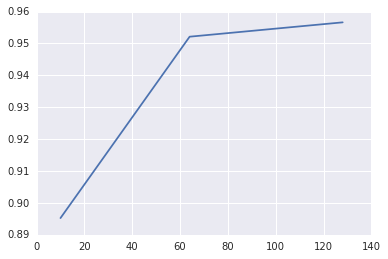

In [47]:
lay = [10,64,128]
num = []
for i in lay:
    num.append(three(i, df, df_target))
plt.plot(lay,num)
print(num)

It starts to overfit after 64 neurons, there isn't much of a accuracy increase after that.

In [55]:
from sklearn.tree import DecisionTreeClassifier
imgclf = DecisionTreeClassifier(random_state=0)
mlp.fit(df, df_target)
cv_scores = cross_validation.cross_val_score(mlp, df, df_target, cv=6)
print(np.mean(cv_scores))

0.8714659140169027


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
imgclfrf = RandomForestClassifier( random_state=0)
imgclfrf.fit(df, df_target)
cv_scores = cross_validation.cross_val_score(imgclfrf, df, df_target, cv=6)
print(np.mean(cv_scores))

0.909898688259751


In [60]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(df, df_target)
cv_scores = cross_validation.cross_val_score(model, df, df_target, cv=6)
print(np.mean(cv_scores))

0.9521268782894455


In [42]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,), max_iter=500)
mlp.fit(df, df_target)
cv_scores = cross_validation.cross_val_score(mlp, df, df_target, cv=4)

In [43]:
cv_scores

array([0.91409692, 0.89356984, 0.92170022, 0.86741573])

In [11]:
regimg = LinearRegression()  
regimg = regimg.fit(df, df_target)
cv_scores = cross_validation.cross_val_score(regimg, df, df_target, cv=4)


In [12]:
cv_scores

array([0.5151475 , 0.55235645, 0.5620749 , 0.40282998])